# 1. Bollinger Bands (BB)
## 1-1. Bollinger Bands (BB) with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("datasets/intraday.csv", parse_dates=["time"], index_col="time")
data

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690
...,...
2019-12-29 22:00:00+00:00,1.119920
2019-12-30 04:00:00+00:00,1.119940
2019-12-30 10:00:00+00:00,1.120095


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


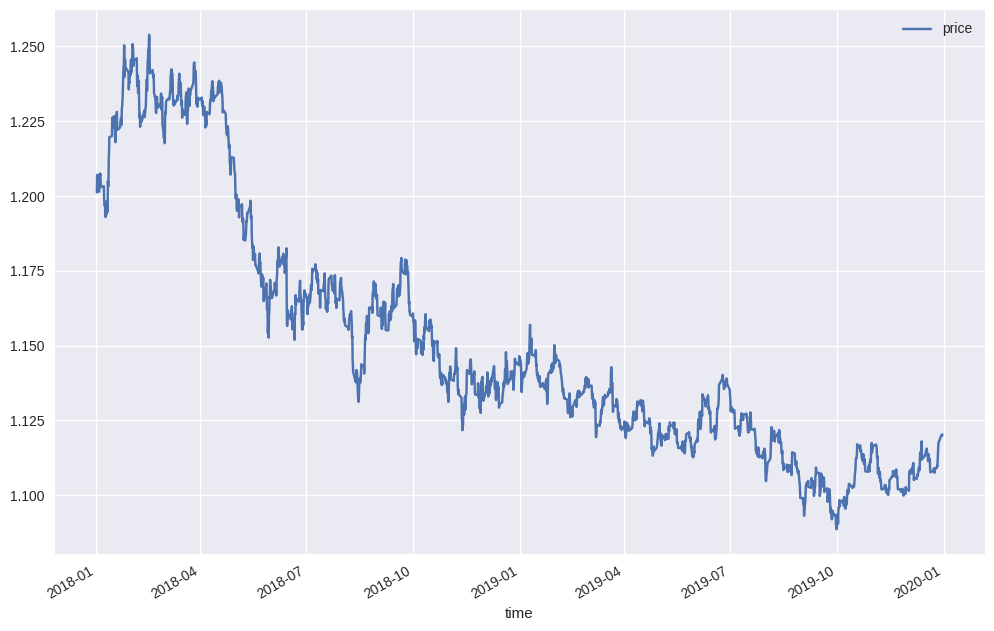

In [4]:
data.plot(figsize=(12, 8))
plt.show()

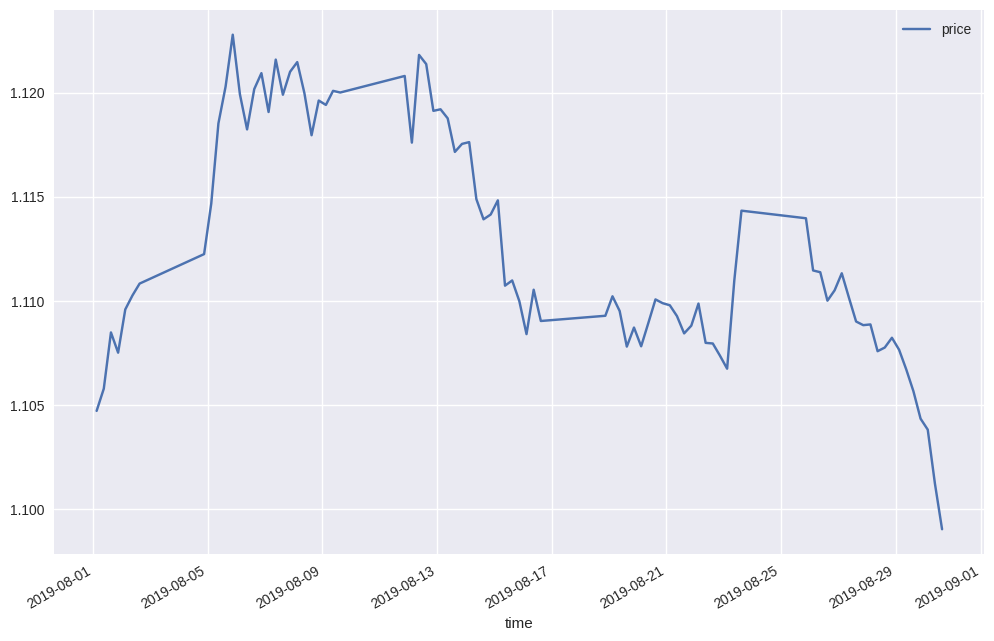

In [5]:
data.loc["2019-08"].plot(figsize=(12, 8))
plt.show()

In [6]:
data["returns"] = np.log(data.div(data.shift(1)))
data

,price,returns
time,,
2018-01-01 22:00:00+00:00,1.201205,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138


In [7]:
window = 30
deviation = 2

data["SMA"] = data["price"].rolling(window).mean()
data

,price,returns,SMA
time,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,NaN
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777


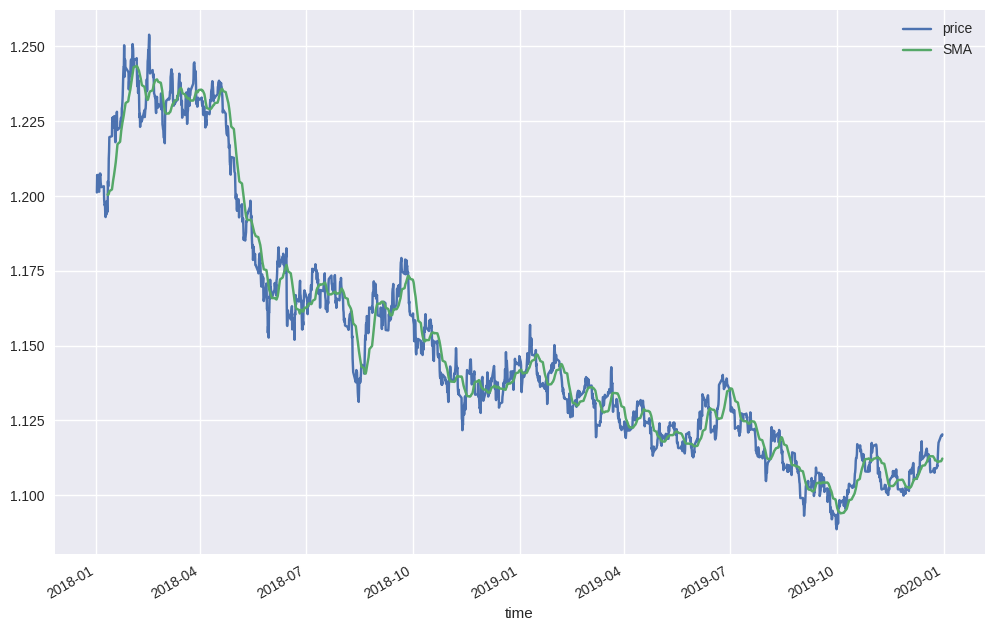

In [8]:
data[["price", "SMA"]].plot(figsize=(12, 8))
plt.show()

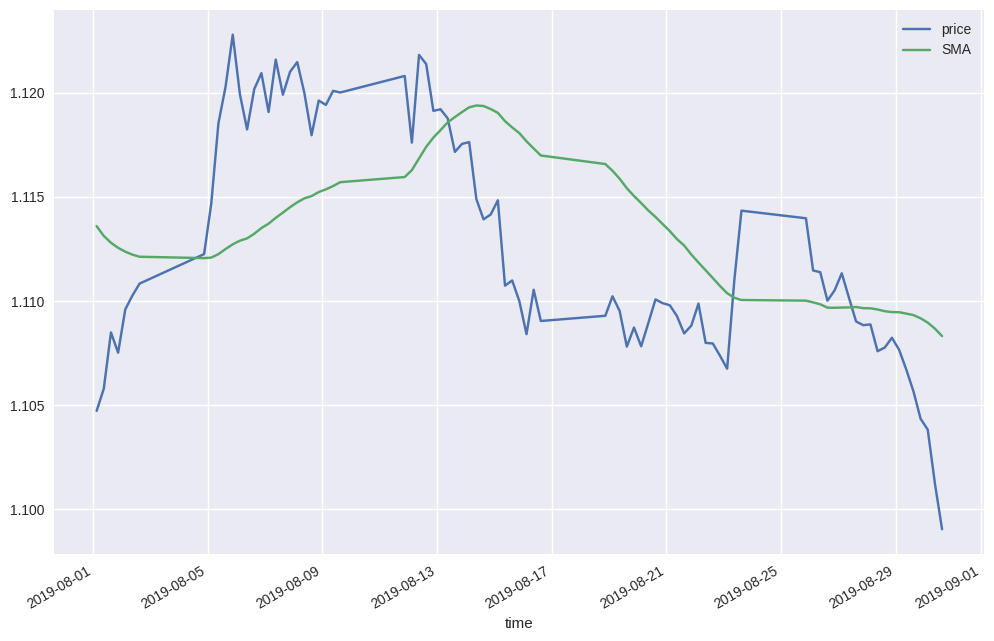

In [9]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize=(12, 8))
plt.show()

In [10]:
data["price"].rolling(window).std()

time
2018-01-01 22:00:00+00:00         NaN
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00         NaN
2018-01-02 22:00:00+00:00         NaN
                               ...   
2019-12-29 22:00:00+00:00    0.003088
2019-12-30 04:00:00+00:00    0.003400
2019-12-30 10:00:00+00:00    0.003729
2019-12-30 16:00:00+00:00    0.004008
2019-12-30 22:00:00+00:00    0.004288
Name: price, Length: 2070, dtype: float64

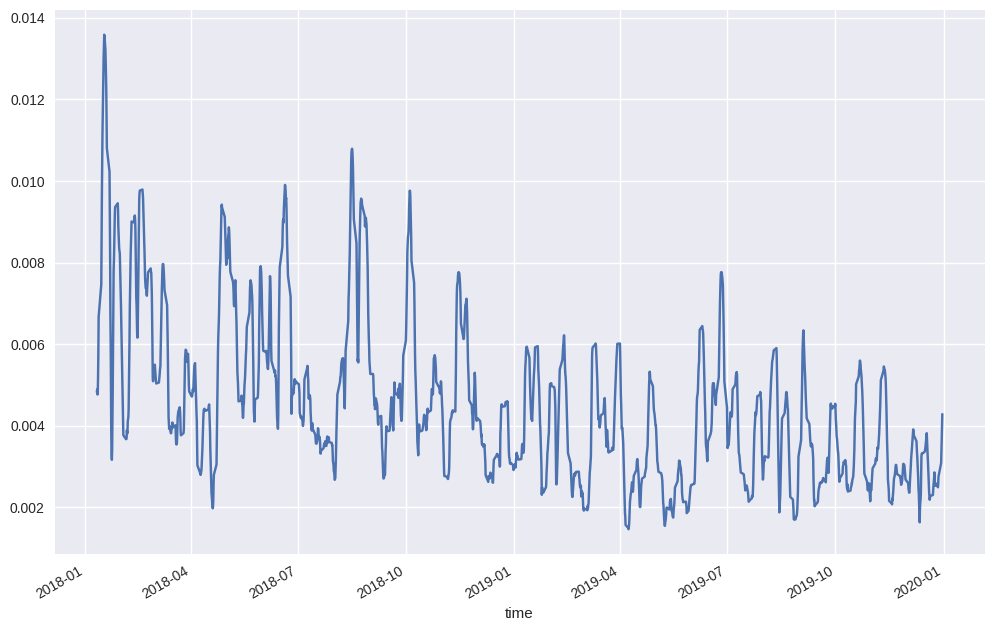

In [11]:
data["price"].rolling(window).std().plot(figsize=(12, 8))
plt.show()

In [12]:
# Lower band - 2 * standard deviation
data["lower"] = data["SMA"] - data["price"].rolling(window).std() * deviation

# Upper band + 2 * standard deviation
data["upper"] = data["SMA"] + data["price"].rolling(window).std() * deviation
data

,price,returns,SMA,lower,upper
time,,,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,NaN,NaN,NaN
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235


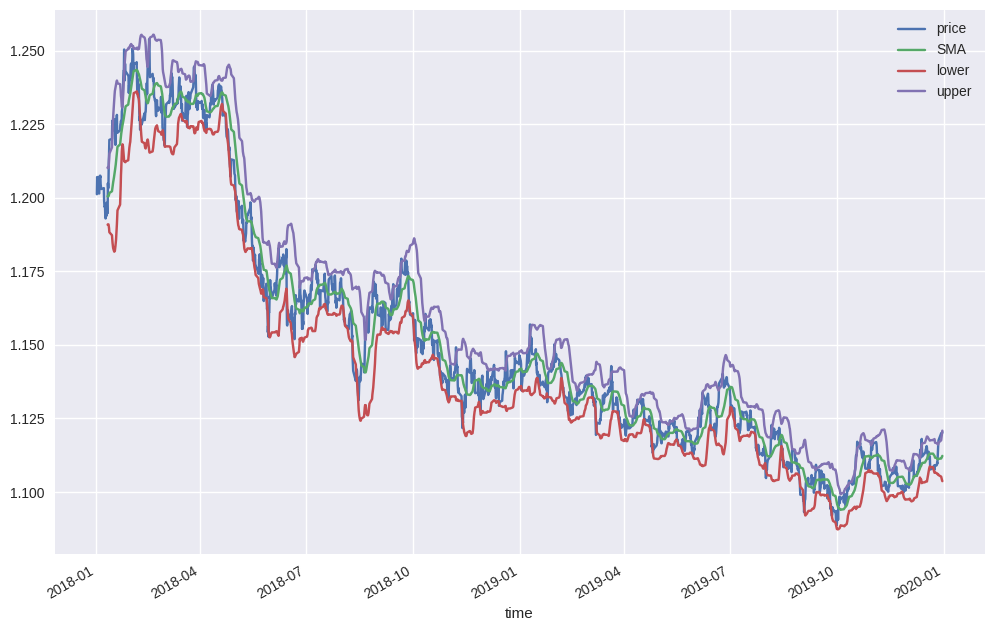

In [13]:
data.drop(columns="returns").plot(figsize=(12, 8))
plt.show()

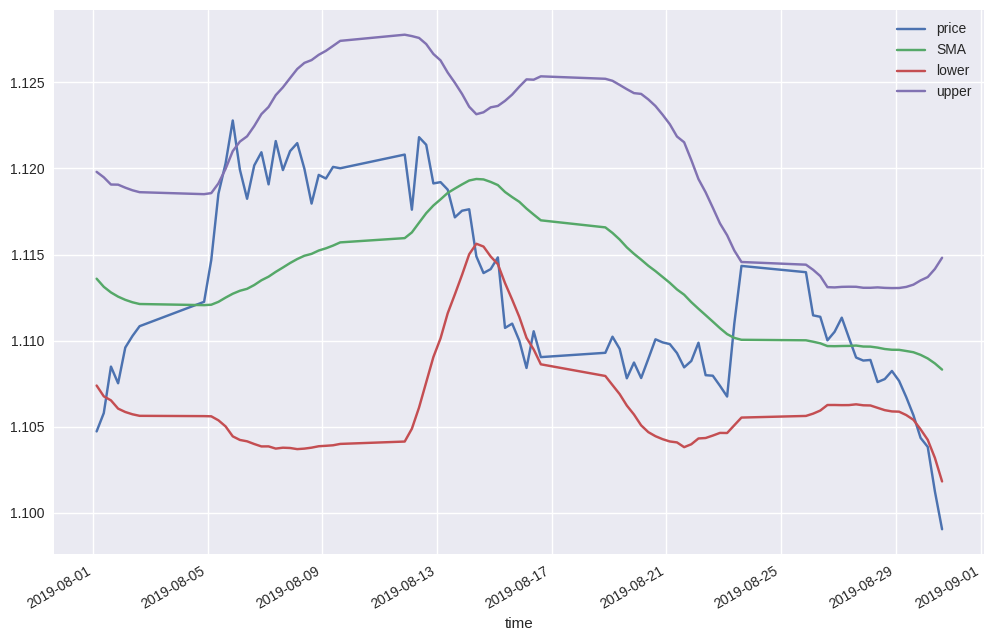

In [14]:
data.drop(columns="returns").loc["2019-08"].plot(figsize=(12, 8))
plt.show()

In [15]:
data.dropna(inplace=True)
data

,price,returns,SMA,lower,upper
time,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122
...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235


## 1-2. Mean Reversion Strategy with Bollinger Bands

In [16]:
data["distance"] = data.price - data.SMA
data

,price,returns,SMA,lower,upper,distance
time,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782
...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318


In [20]:
# If oversold then go long
data["position"] = np.where(data.price < data.lower, 1, np.nan)

# If overbought then go short
data["position"] = np.where(data.price > data.upper, -1, data["position"])

# If crossing SMA (middle band) then go neutral
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

# Where the above conditions aren't applicable then hold previous position 
data["position"] = data.position.ffill().fillna(0)
data

,price,returns,SMA,lower,upper,distance,position
time,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0


In [21]:
data.position.value_counts()

position
 0.0    919
 1.0    596
-1.0    526
Name: count, dtype: int64

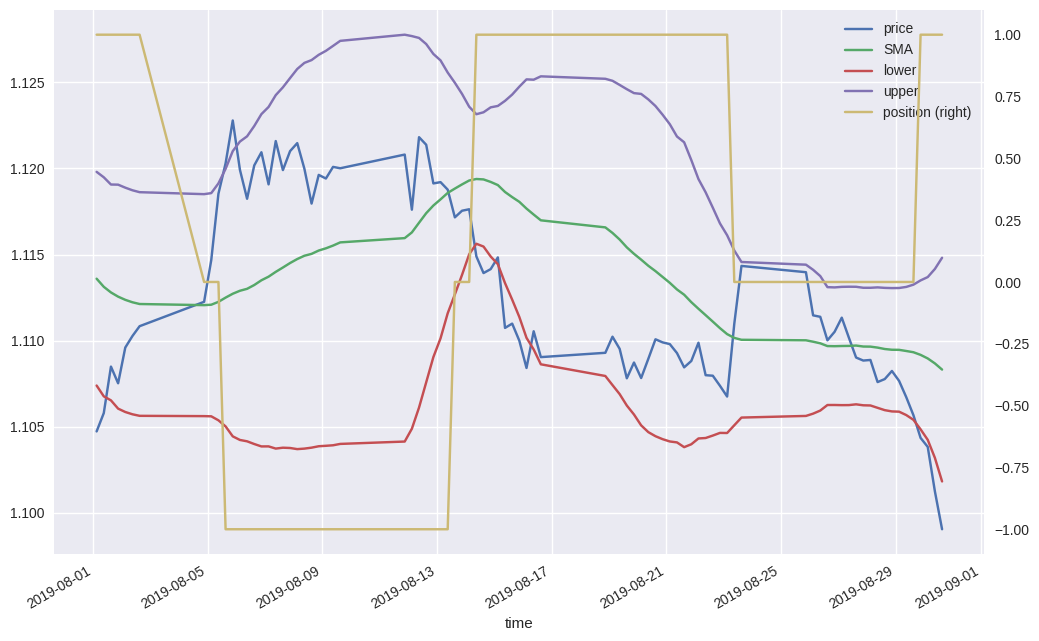

In [22]:
data.drop(columns=["returns", "distance"]).loc["2019-08"].plot(figsize=(12, 8), secondary_y="position")
plt.show()

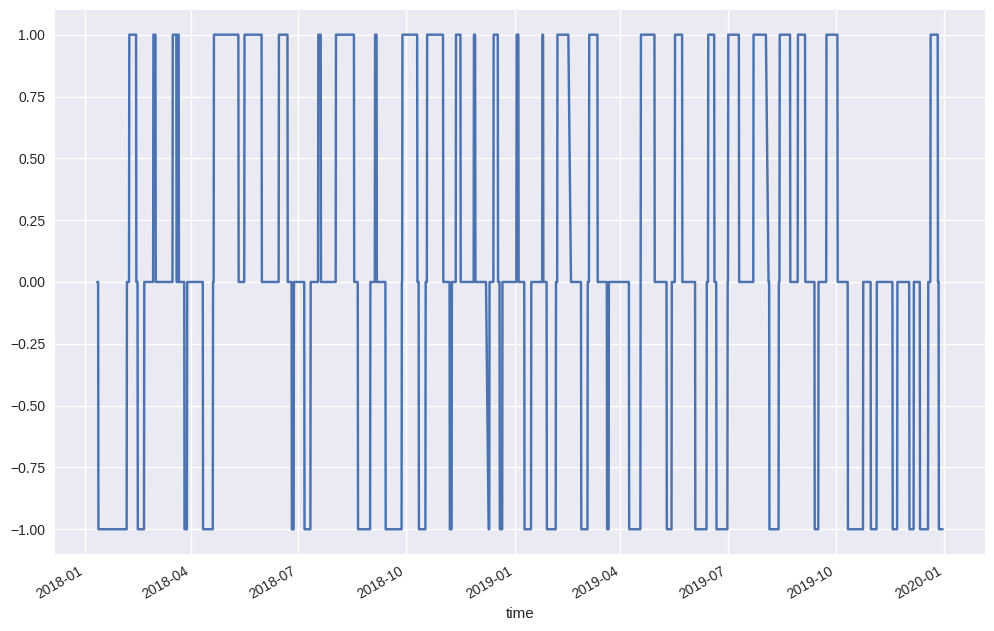

In [23]:
data.position.plot(figsize=(12, 8))
plt.show()

In [24]:
# Vectorized strategy backtesting
data["strategy"] = data.position.shift(1) * data["returns"]
data

,price,returns,SMA,lower,upper,distance,position,strategy
time,,,,,,,,
2018-01-11 04:00:00+00:00,1.194770,-0.000498,1.200504,1.190849,1.210160,-0.005734,0.0,NaN
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000
...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138


In [25]:
data.dropna(inplace=True)
data

,price,returns,SMA,lower,upper,distance,position,strategy
time,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887
...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138


In [26]:
data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)
data

,price,returns,SMA,lower,upper,distance,position,strategy,cum_returns,cum_strategy
time,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115
...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387


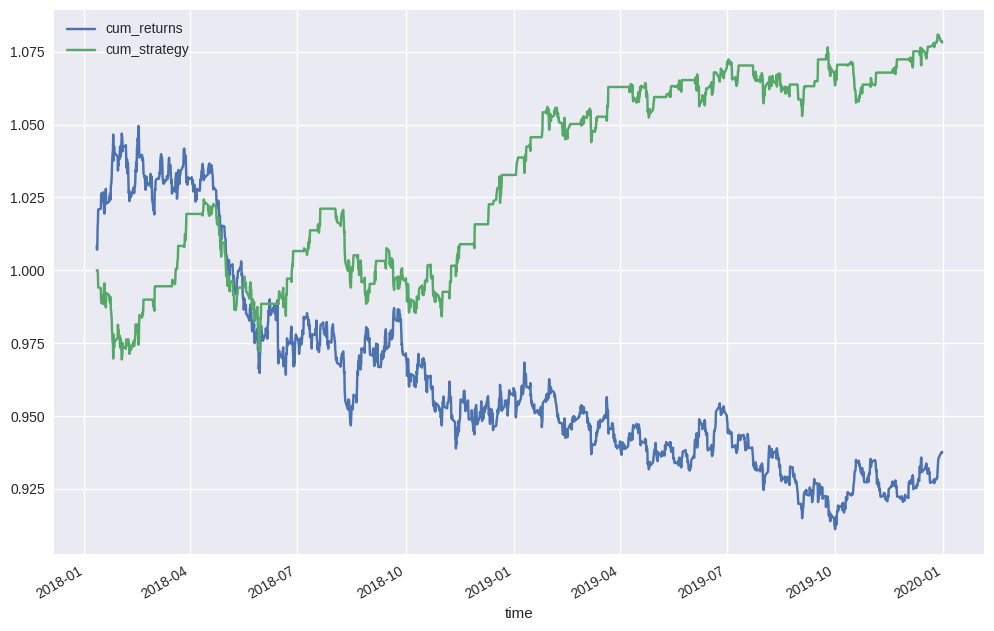

In [27]:
data[["cum_returns", "cum_strategy"]].plot(figsize=(12, 8))
plt.show()

In [28]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,price,returns,SMA,lower,upper,distance,position,strategy,cum_returns,cum_strategy,trades
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0


In [29]:
data.trades.value_counts()

trades
0.0    1929
1.0     111
Name: count, dtype: int64

In [30]:
ptc = 0.00007

data["strategy_net"] = data.strategy - data.trades * ptc
data

,price,returns,SMA,lower,upper,distance,position,strategy,cum_returns,cum_strategy,trades,strategy_net
time,,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0,0.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0,-0.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0,0.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0,-0.000070
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0,-0.001887
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0,-0.002092
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0,-0.000018
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0,-0.000138


In [31]:
data["cum_strategy_net"] = data.strategy_net.cumsum().apply(np.exp)
data

,price,returns,SMA,lower,upper,distance,position,strategy,cum_returns,cum_strategy,trades,strategy_net,cum_strategy_net
time,,,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,1.008491,1.000000,0.0,0.000000,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,1.007060,1.000000,0.0,-0.000000,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,1.008700,1.000000,0.0,0.000000,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,0.000000,1.014865,1.000000,1.0,-0.000070,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,1.016781,0.998115,0.0,-0.001887,0.998045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.937352,1.078555,0.0,-0.002092,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.937369,1.078536,0.0,-0.000018,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.937498,1.078387,0.0,-0.000138,1.070040


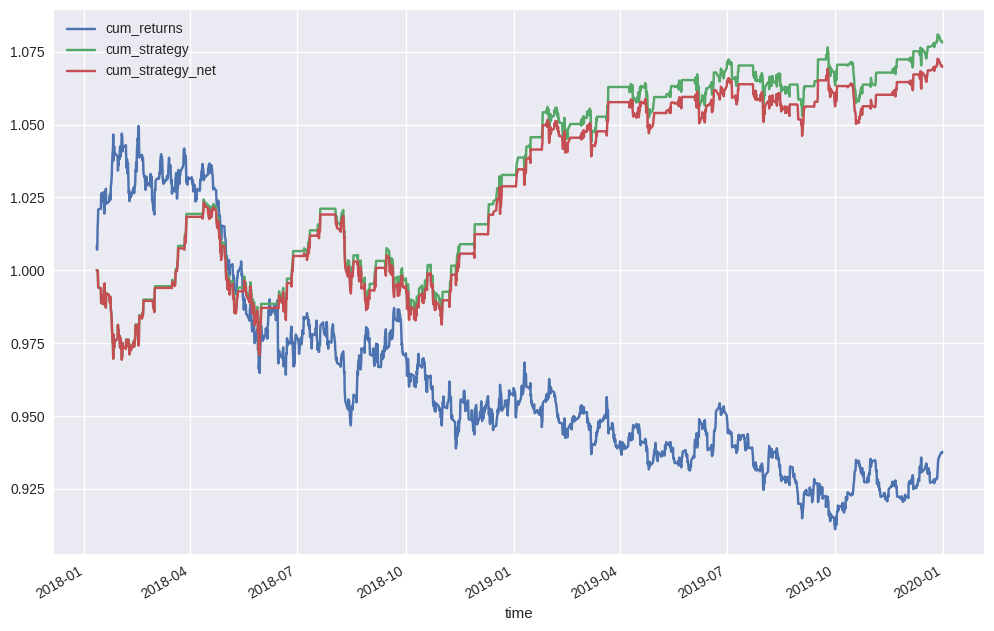

In [32]:
data[["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12, 8))
plt.show()

In [33]:
# Annualized return
data[["returns", "strategy_net"]].mean() * (4 * 252)

returns        -0.031776
strategy_net    0.033335
dtype: float64

In [34]:
# Annualized risk
data[["returns", "strategy_net"]].std() * np.sqrt(4 * 252)

returns         0.059975
strategy_net    0.044624
dtype: float64